<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab10/ex_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

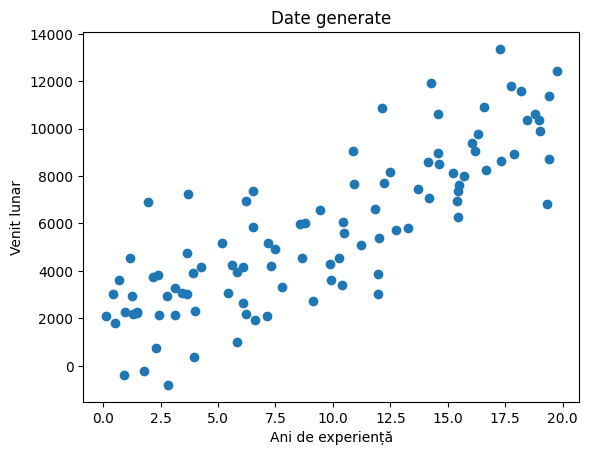

Output()

Output()

           mean       sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha  1429.647  334.291   800.122   2106.603      7.945    5.669    1773.0   
beta    453.919   30.323   394.785    513.163      0.716    0.506    1803.0   
sigma  1809.260  128.582  1562.613   2062.187      2.649    1.889    2389.0   

       ess_tail  r_hat  
alpha    1753.0    1.0  
beta     1682.0    1.0  
sigma    2159.0    1.0  


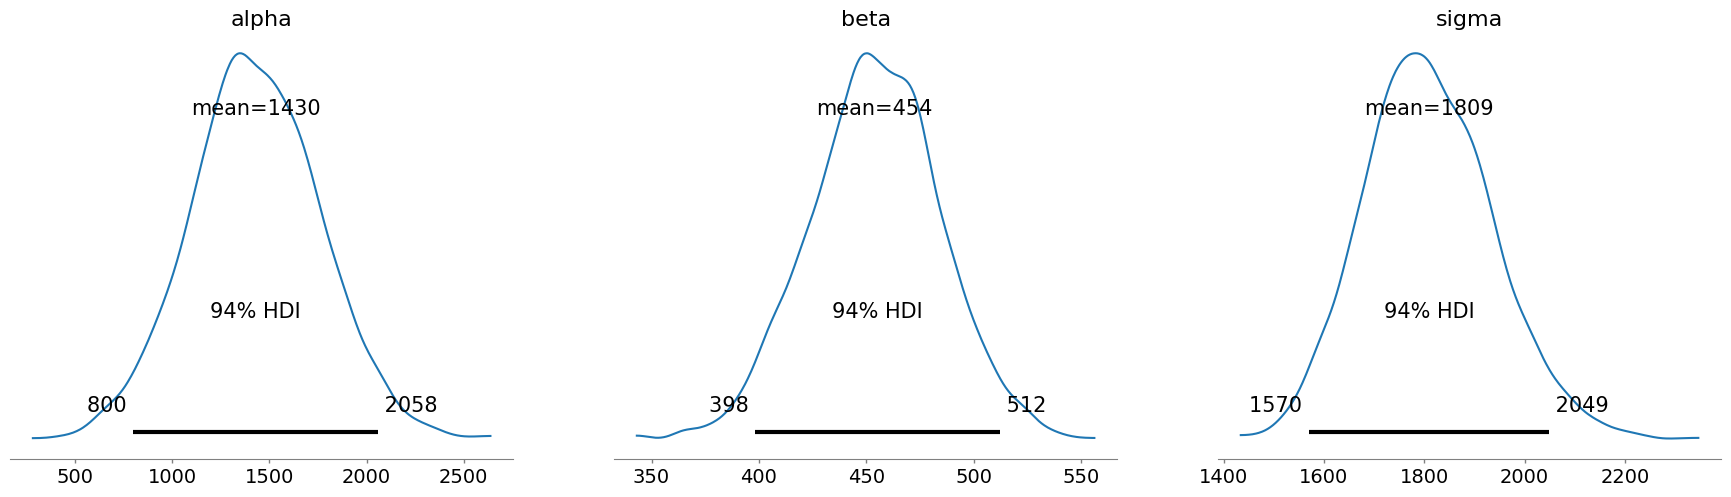

Adevărat alpha: 1000
Estimare alpha: 1429.6468449503536
Adevărat beta: 500
Estimare beta: 453.9193527304223
Adevărat sigma: 2000
Estimare sigma: 1809.259752464015


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

# a)
np.random.seed(42)

N = 100
x = np.random.uniform(0, 20, N)

alpha = 1000
beta = 500
sigma = 2000

y = alpha + beta * x + np.random.normal(0, sigma, N)

plt.scatter(x, y)
plt.xlabel('Ani de experiență')
plt.ylabel('Venit lunar')
plt.title('Date generate')
plt.show()



# b)
with pm.Model() as model:
    alpha_prior = pm.Normal('alpha', mu=0, sigma=10000)
    beta_prior = pm.Normal('beta', mu=0, sigma=1000)
    sigma_prior = pm.HalfNormal('sigma', sigma=1000)

    mu = alpha_prior + beta_prior * x

    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma_prior, observed=y)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True, random_seed=42)

print(az.summary(trace, hdi_prob=0.95))

az.plot_posterior(trace)
plt.show()

print(f"Adevărat alpha: {alpha}")
print(f"Estimare alpha: {trace.posterior['alpha'].mean().values}")

print(f"Adevărat beta: {beta}")
print(f"Estimare beta: {trace.posterior['beta'].mean().values}")

print(f"Adevărat sigma: {sigma}")
print(f"Estimare sigma: {trace.posterior['sigma'].mean().values}")
